## Euclidean and Manhattan Distance Calculations

In this short mini project you will see examples and comparisons of distance measures. Specifically, I'll visually compare the Euclidean distance to the Manhattan distance measures. The application of distance measures has a multitude of uses in data science and is the foundation of many algorithms, such as Prinical Components Analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# Load Course Numerical Dataset
df = pd.read_csv('distance_dataset.csv',index_col=0)
df.head()

,X,Y,Z,ClusterID
0,5.135779,4.167542,5.787635,4
1,4.280721,5.770909,6.091044,4
2,8.329098,7.540436,3.247239,2
3,5.470224,5.069249,5.768313,4
4,2.381797,2.402374,3.879101,1


In [3]:
df.describe()

,X,Y,Z,ClusterID
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,5.002561,5.032657,5.017639,3.000000
std,1.935367,1.956047,1.957894,1.414567
min,1.170533,1.350509,1.015867,1.000000
25%,4.544975,3.704038,3.790899,2.000000
50%,4.998504,5.081169,5.015852,3.000000
75%,5.457089,6.348823,6.345780,4.000000
max,8.983353,8.343726,8.600705,5.000000


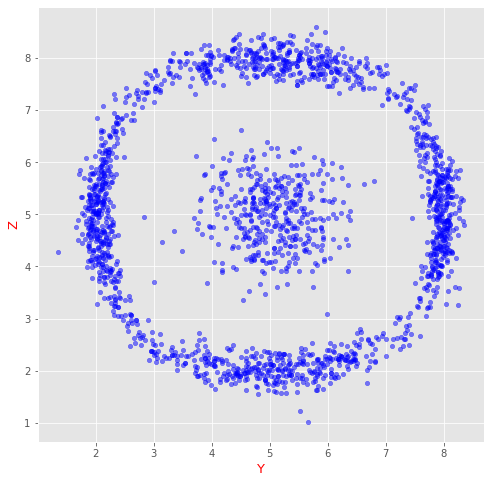

In [4]:
plt.figure(figsize=(8,8))
plt.scatter(df.Y, df.Z, c='blue', s=20, alpha=0.5)
plt.xlabel('Y',c='red',fontsize= 13)
plt.ylabel('Z',c='red',fontsize= 13)
plt.show()

### Euclidean Distance

Let's visualize the difference between the Euclidean and Manhattan distance.

I am using Pandas to load the dataset .CSV file and Numpy to compute the __Euclidean distance__ to the point (Y=5, Z=5) that I choose as reference. On the left, I show the dataset projected onto the YZ plane and color coded per the Euclidean distance I just computed. As we are used to, points that lie at the same Euclidean distance define a regular 2D circle of radius that distance.

Note that the __SciPy library__ comes with optimized functions written in C to compute distances (in the scipy.spatial.distance module) that are much faster than our (naive) implementation.

**<font color='teal'>Create a distance to reference point (3,3) matrix similar to the above example.</font>**

In [5]:
# In the Y-Z plane, I compute the distance to ref point (3,3)
distEuclid = np.sqrt((df.Z-3)**2 + (df.Y-3)**2)

**<font color='teal'>Plotting distance matrix and review the result to deepen my understanding of Euclidean distances. </font>**

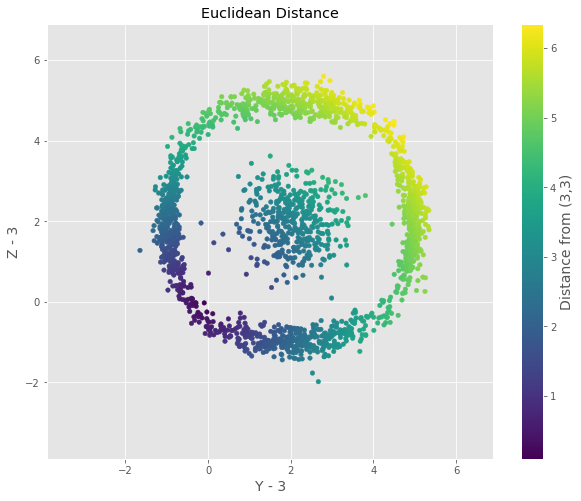

In [6]:
figEuclid = plt.figure(figsize=[10,8])

plt.scatter(df.Y - 3, df.Z-3, c=distEuclid, s=20)
plt.ylim([-3.9,6.9])
plt.xlim([-3.9,6.9])
plt.xlabel('Y - 3', size=14)
plt.ylabel('Z - 3', size=14)
plt.title('Euclidean Distance')
cb = plt.colorbar()
cb.set_label('Distance from (3,3)', size=14)

#figEuclid.savefig('plots/Euclidean.png')

### Manhattan Distance

Manhattan distance is simply the sum of absolute differences between the points coordinates. This distance is also known as the taxicab or city block distance as it measure distances along the coorinate axis which creates "paths" that look like a cab's route on a grid-style city map.

We display the dataset projected on the XZ plane here color coded per the Manhattan distance to the (X=5, Z=5) reference point. We can see that points laying at the same distance define a circle that looks like a Euclidean square.

In [7]:
# In the Y-Z plane, I compute the distance to ref point (4,4)
distManhattan = np.abs(df.X - 4) + np.abs(df.Z - 4)

**<font color='teal'>Create a Manhattan distance to reference point (4,4) matrix similar to the above example and replace the value for 'c' in the plotting cell to view the result.</font>**

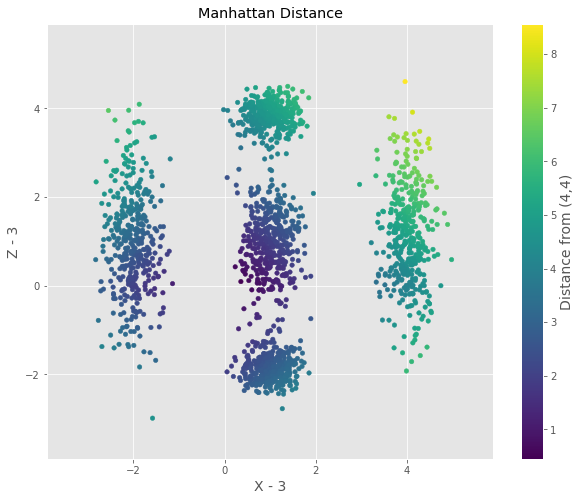

In [8]:
figManh = plt.figure(figsize=[10,8])

plt.scatter(df.X - 4, df.Z-4, c= distManhattan, s=20)
plt.ylim([-3.9,5.9])
plt.xlim([-3.9,5.9])
plt.xlabel('X - 3', size=14)
plt.ylabel('Z - 3', size=14)
plt.title('Manhattan Distance')
cb = plt.colorbar()
cb.set_label('Distance from (4,4)', size=14)

#figManh.savefig('plots/Manhattan.png')

There are 5 clusters, left and right clusters have larger variance.

Now let's create distributions of these distance metrics and compare them. I leverage the scipy dist function to create these matrices similar to how I manually created them earlier in the exercise.

In [9]:
import scipy.spatial.distance as dist

mat = df[['X','Y','Z']].to_numpy()

#Calculate pairwise euclidean distance
DistEuclid = dist.pdist(mat,'euclidean')

#Calculate pairwise city block distance
DistManhattan = dist.pdist(mat, 'cityblock')

largeMat = np.random.random((10000,100))

**<font color='teal'>Plot histograms of each distance matrix for comparison.</font>**

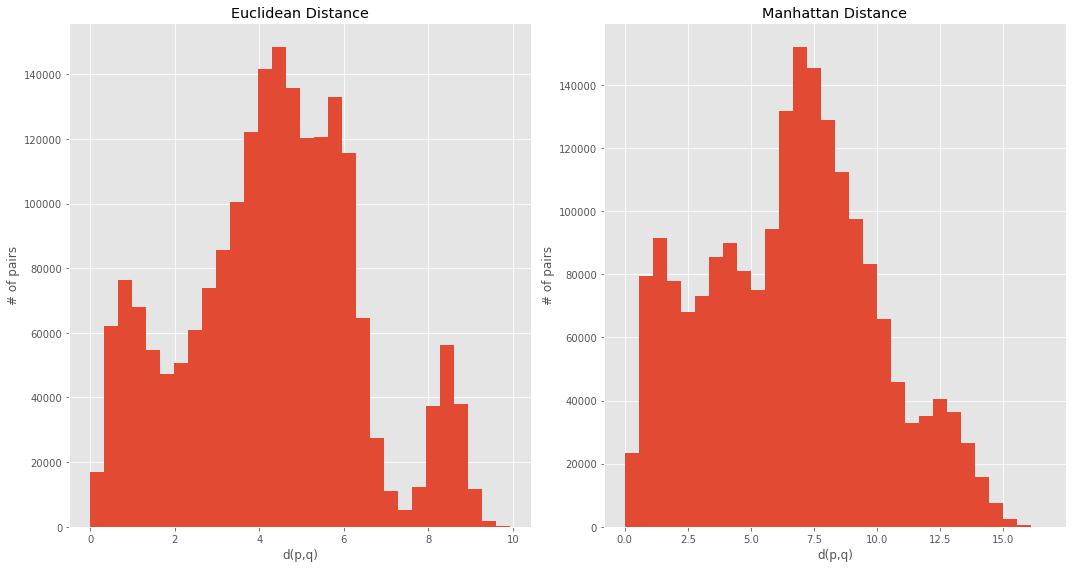

In [10]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.hist(DistEuclid, bins=30)
plt.xlabel('d(p,q)')
plt.ylabel('# of pairs')
plt.title('Euclidean Distance')


plt.subplot(1,2,2)
plt.hist(DistManhattan, bins=30)
plt.xlabel('d(p,q)')
plt.ylabel('# of pairs')
plt.title('Manhattan Distance')

plt.tight_layout()
plt.show()

**Look at the x-axis of histograms:**
    * Pairwise euclidean distance range is between 0 and 10
    * Pairwise city block distance range is between 0 and about 16
    
**Mode of eculidean distance is smaller than mode of Manhattan distance.**    